In [1]:
# Dataset Link 
 
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
# Problem 1: 
# Prediction task is to determine whether a person makes over 50K a year. 
 
# Problem 2: 
# Which factors are important 
 
# Problem 3: 
# Which algorithms are best for this dataset 

In [1]:
#Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import classification_report


%matplotlib inline

import os
os.chdir("C:\\Users\\HP\\Desktop\\Learning\\DataScience\\01Materials\\26.PROJECT-3 APPLICATION OF CLASSIFICATION MODELS\\Assignment")

In [2]:
train_set = pd.read_csv('adult_train.data', header = None) 
test_set = pd.read_csv('adult_test.test', skiprows = 1, header = None) 
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
train_set.columns = col_labels 
test_set.columns = col_labels 

In [3]:
#IMPORT THE DATABASE

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('adult_train.data', names=columns)
test = pd.read_csv('adult_test.test', names=columns, skiprows=1)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Clean the Data

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))


In [5]:
#REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [6]:
# Converting to int

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


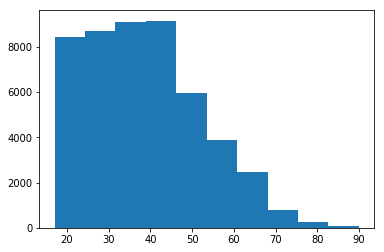

In [7]:
####################### Visualizations #############################

plt.hist(dff['Age']);

dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

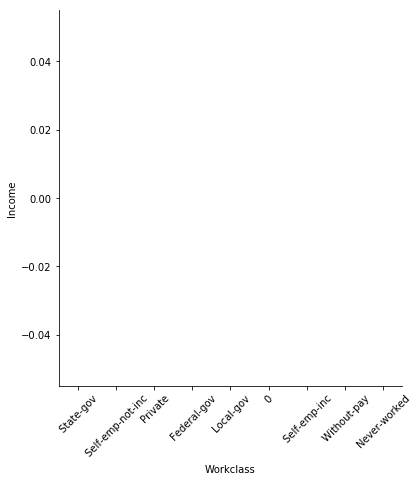

In [8]:
#  WORKCLASS
dff.fillna(' 0', inplace=True)

sn.factorplot(x="Workclass", y="Income", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['Workclass'].value_counts()


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


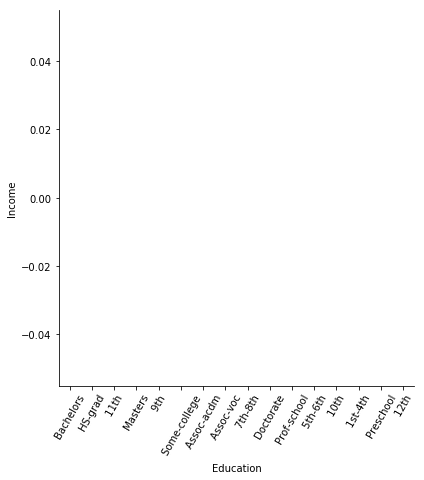

In [9]:
# EDUCATION
sn.factorplot(x="Education",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


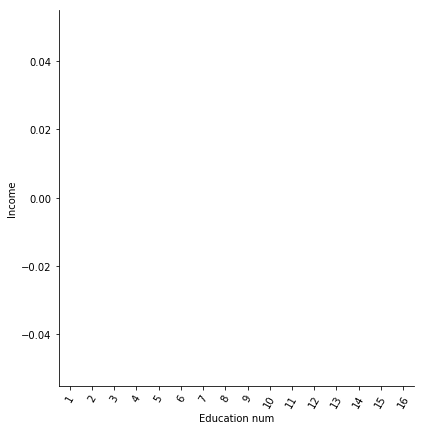

In [10]:
#  EDUCATION NO
sn.factorplot(x="Education num",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


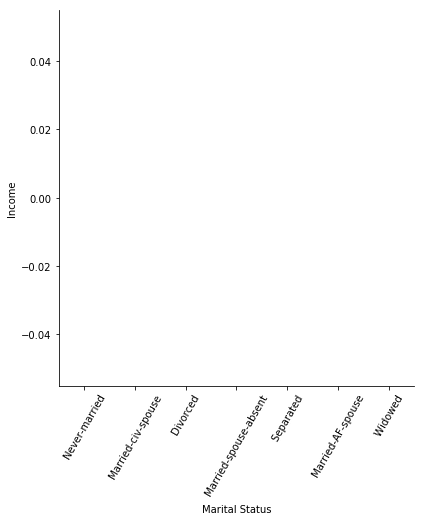

In [11]:
# MARITAL status
sn.factorplot(x="Marital Status",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


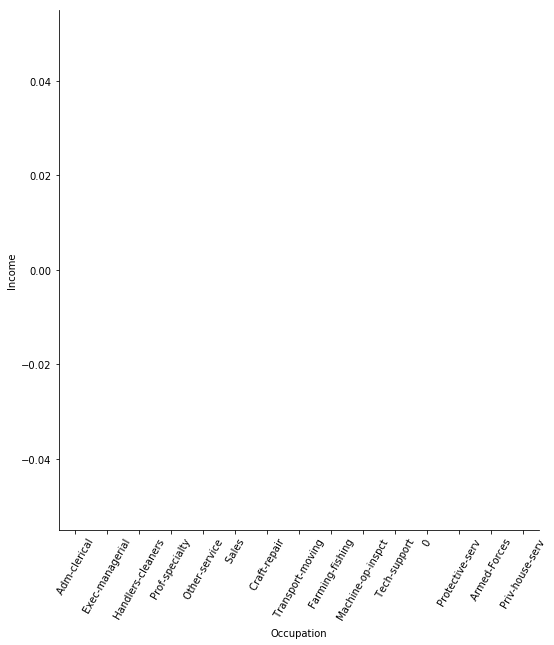

In [12]:
# OCCUPATION
sn.factorplot(x="Occupation",y="Income",data=dff,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


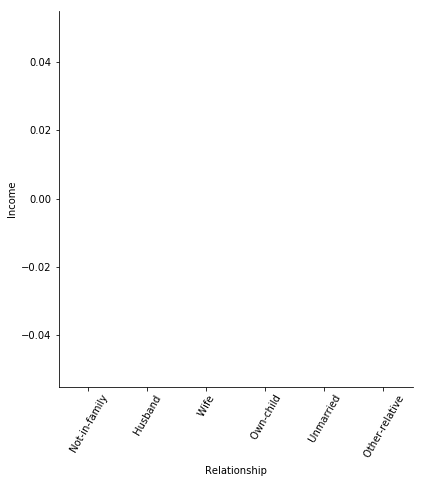

In [13]:
# Relationship
sn.factorplot(x="Relationship",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


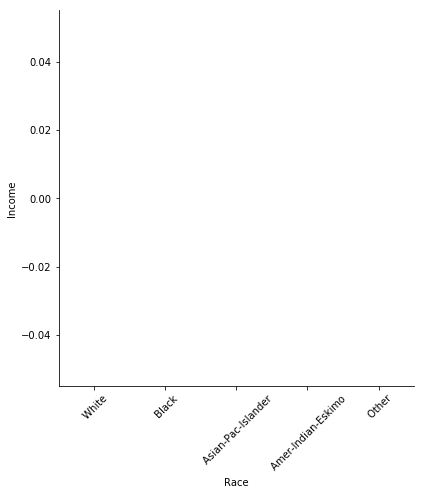

In [14]:
# RACE
sn.factorplot(x="Race",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


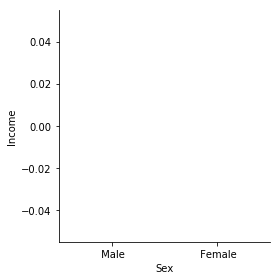

In [15]:
# SEX
sn.factorplot(x="Sex",y="Income",data=dff,kind="bar", size = 4, 
palette = "muted");

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


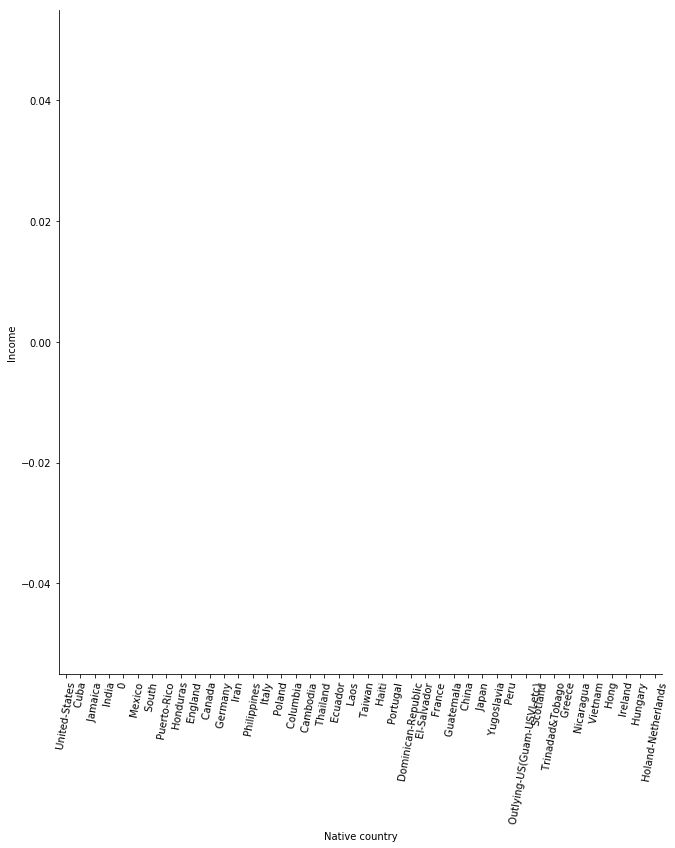

In [16]:
#     Native county   
sn.factorplot(x="Native country",y="Income",data=dff,kind="bar", size = 10, 
palette = "muted")
plt.xticks(rotation=80);

In [17]:
# Preparing data for Training and testing 

X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

#Splitting data as train and test data 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2,random_state = 0)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [18]:
#CLASSIFICATION - LOGISTIC REGRESSION

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5537 2693]
 [ 206 1333]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      8230
           1       0.33      0.87      0.48      1539

   micro avg       0.70      0.70      0.70      9769
   macro avg       0.65      0.77      0.64      9769
weighted avg       0.86      0.70      0.74      9769

The Accuracy for Logistic Regression is 0.7032449585423278


In [19]:
#LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[7863  367]
 [1067  472]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8230
           1       0.56      0.31      0.40      1539

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.72      0.63      0.66      9769
weighted avg       0.83      0.85      0.83      9769

The Accuracy for LDA is 0.8532091309243526


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
#LINEAR REGRESSION

from sklearn import linear_model
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_



print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
print("The Accuracy for Linear Regression is {}".format(LA))

[[8145   85]
 [1384  155]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8230
           1       0.65      0.10      0.17      1539

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.75      0.55      0.55      9769
weighted avg       0.82      0.85      0.80      9769

The Accuracy for Linear Regression is 0.8496263691268298


In [21]:
# KNN  

from sklearn import preprocessing, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[7693  537]
 [1031  508]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8230
           1       0.49      0.33      0.39      1539

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.68      0.63      0.65      9769
weighted avg       0.82      0.84      0.83      9769

The Accuracy for KNN is 0.8394922714709796


In [22]:
# Decision tree  

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[8054  176]
 [1185  354]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8230
           1       0.67      0.23      0.34      1539

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.77      0.60      0.63      9769
weighted avg       0.84      0.86      0.83      9769

The Accuracy for Decision Tree Model is 0.8606817483877572


In [23]:
#SVM  
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))

[[8212   18]
 [1503   36]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8230
           1       0.67      0.02      0.05      1539

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.76      0.51      0.48      9769
weighted avg       0.82      0.84      0.78      9769

The Accuracy for SVM is 0.8443034087419388


In [24]:
#NAIVE   
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
 
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[1 1 1 ... 1 1 1]
[[2348 5882]
 [  58 1481]]
              precision    recall  f1-score   support

           0       0.98      0.29      0.44      8230
           1       0.20      0.96      0.33      1539

   micro avg       0.39      0.39      0.39      9769
   macro avg       0.59      0.62      0.39      9769
weighted avg       0.85      0.39      0.42      9769

The Accuracy for NB is 0.3919541406489917


In [25]:
# neural_network   
print("neural_network ")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
NNpre = mlp.predict(X_test)

print(confusion_matrix(y_test,NNpre))
print(classification_report(y_test,NNpre))
NNA = accuracy_score(y_test, NNpre)
print("The Accuracy for Neural Network is {}".format(NNA))

neural_network 
[[7665  565]
 [1007  532]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8230
           1       0.48      0.35      0.40      1539

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.68      0.64      0.66      9769
weighted avg       0.82      0.84      0.83      9769

The Accuracy for Neural Network is 0.8390828129798341


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
# KMEANS ###################################

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labelspre = k_means.predict(X_test)
print(confusion_matrix(y_test,labelspre))
print(classification_report(y_test,labelspre))
KmeanA = accuracy_score(y_test, labelspre)
print("The Accuracy for kmeans is {}".format(KmeanA))

[[5478 2752]
 [ 373 1166]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      8230
           1       0.30      0.76      0.43      1539

   micro avg       0.68      0.68      0.68      9769
   macro avg       0.62      0.71      0.60      9769
weighted avg       0.84      0.68      0.72      9769

The Accuracy for kmeans is 0.6801105537926093


In [27]:
#XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.294714 using {'learning_rate': 0.3}
-0.687370 (0.000025) with: {'learning_rate': 0.0001}
-0.640113 (0.000232) with: {'learning_rate': 0.001}
-0.413598 (0.001883) with: {'learning_rate': 0.01}
-0.300088 (0.004809) with: {'learning_rate': 0.1}
-0.296613 (0.005150) with: {'learning_rate': 0.2}
-0.294714 (0.005507) with: {'learning_rate': 0.3}


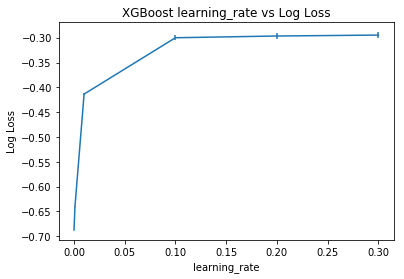

In [28]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

Best: -0.292986 using {'learning_rate': 0.2, 'n_estimators': 300}
-0.687370 (0.000025) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.681705 (0.000050) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.676152 (0.000074) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.670706 (0.000098) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.665365 (0.000121) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.640113 (0.000232) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.596119 (0.000445) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.559214 (0.000668) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.527936 (0.000886) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.501253 (0.001092) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.413598 (0.001883) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.344338 (0.003080) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.321935 (0.003650) with: {'learning_rate': 0.01, 'n_e

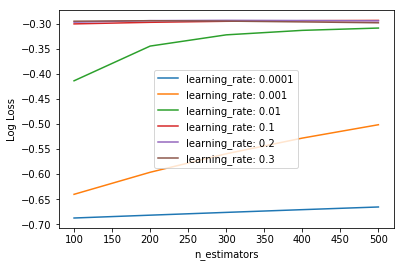

In [29]:
# This xgboost code is where I experiment which learning rate and what number of estimators are BEST
# Problem 2: 
# Which factors are important 

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
# grid search

model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))

for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

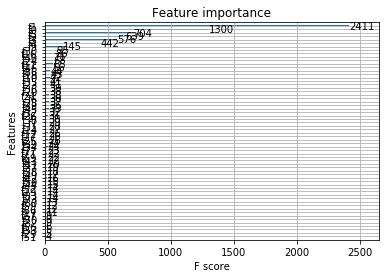

training set auc: 0.8628314054662709
test set auc: 0.8628314054662709
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8628314054662709


In [30]:
# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

In [52]:
# Problem 1: 
# Prediction task is to determine whether a person makes over 50K a year. 
 
#Person is 25 years old, working as private job as Machine-op-inspct, Person is male, his education_num is 7
#He has passed 11th, his race is black, his capital gain and capital loss is 0,he Never-married
#He works 40 hours per week and his native country is United-States, his fnlwgt is 556802 predictions = model.predict(X_test)
column= X_test.column
print(column)

wage_class_pred = predictions = model.predict(pd.DataFrame(np.array([[25, 3, 556802, 1, 7, 4, 6, 3, 2, 1, 0, 0, 40, 37]]), columns = X_test.columns))
print("The predicted wage_class is:",wage_class_pred[0] )
# # print("\n")

AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [42]:
# Problem 2: 
# Which factors are important 
coff=pd.DataFrame(lm.coef_).T 
col=pd.DataFrame(col_labels).T 
print("The coefficient for all features:", coff)
print("The column names:",col)


The coefficient for all features:          0         1         2         3        4         5             6   \
0  0.025078  0.005506  0.054458  0.039355  0.02443  0.024589 -8.483707e+09   

             7         8             9   ...       79        80        81  \
0 -1.232690e+10  0.000593 -2.317046e+10  ... -0.00092  0.000349 -0.000348   

         82        83        84        85        86        87        88  
0 -0.001366  0.003207  0.000156 -0.000412  0.008678 -0.000593  0.002586  

[1 rows x 89 columns]
The column names:     0          1       2          3              4               5   \
0  age  workclass  fnlwgt  education  education_num  marital_status   

           6             7     8    9             10            11  \
0  occupation  relationship  race  sex  capital_gain  capital_loss   

               12              13          14  
0  hours_per_week  native_country  wage_class  


In [ ]:
# Problem 2: 
# Which factors are important 
 
The factors which are <0.05 of co-oefficient we can consider as important. All are having <0.05 so all features are important.



In [ ]:
# Problem 3: 
# Which algorithms are best for this dataset 
The Accuracy for Logistic Regression is 0.7032449585423278
The Accuracy for LDA is 0.8532091309243526
The Accuracy for Linear Regression is 0.8496263691268298
The Accuracy for KNN is 0.8394922714709796
The Accuracy for Decision Tree Model is 0.8606817483877572
The Accuracy for SVM is 0.8443034087419388
The Accuracy for NB is 0.3919541406489917
The Accuracy for Neural Network is 0.8384686252431159
The Accuracy for kmeans is 0.31988944620739074
The Accuracy for XGBoost is 0.8628314054662709

From all the models the best is XGboost with 86.28% accuracy followed by Decision tree witH 86.07% 